In [11]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

In [12]:
# Load Fashine MNIST
(X_train, y_train0), (X_test, y_test0) = fashion_mnist.load_data()

# Reshape size
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

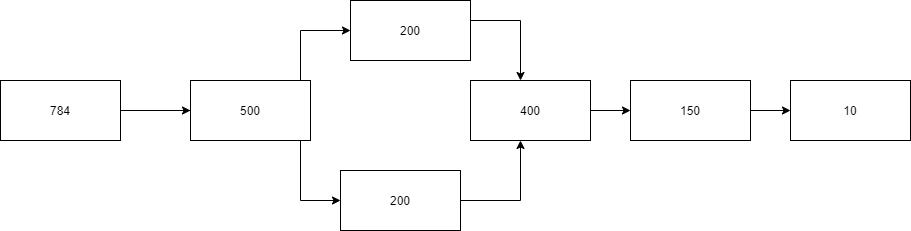

In [13]:
from IPython.display import Image
Image(filename= "1.png")

In [14]:
f_1 = Dense(500, activation='relu')
f_2 = Dense(200, activation='relu')
f_3 = Dense(200, activation='sigmoid')
f_4 = Dense(150, activation='sigmoid')
f_5 = Dense(10, activation='softmax')

In [15]:
x = Input(shape=(784,))

In [16]:
h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(h_1)
s = concatenate([h_2, h_3])
h_4 = f_4(s)
y = f_5(h_2)

In [17]:
model = Model(x, y)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_6 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, 
          batch_size=600, 
          epochs=9)

Train on 60000 samples
Epoch 1/9
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0311 - accuracy: 0.7830
Epoch 2/9
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0205 - accuracy: 0.8606
Epoch 3/9
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0184 - accuracy: 0.8759
Epoch 4/9
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0169 - accuracy: 0.8858
Epoch 5/9
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0161 - accuracy: 0.8911
Epoch 6/9
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0156 - accuracy: 0.8943
Epoch 7/9
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0150 - accuracy: 0.8994
Epoch 8/9
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0141 - accuracy: 0.9044
Epoch 9/9
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0135 - accuracy: 0.9091


In [20]:
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 1s 13us/sample - loss: 0.0127 - accuracy: 0.9155
Loss: 0.01271583108852307
準確率: 91.55333042144775
